In [ ]:
!pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 29.2 MB/s 
     |████████████████████████████████| 2.0 MB 28.5 MB/s 


In [105]:
import textstat
#import spacy
import pandas as pd
#from textstat.textstat import textstatistics,legacy_round
from textstat.textstat import textstatistics
import numpy as np
import re

https://www.geeksforgeeks.org/readability-index-pythonnlp/

https://www.kaggle.com/code/yhirakawa/textstat-how-to-evaluate-readability

https://github.com/textstat/textstat

https://www.kaggle.com/code/laiscarraro/text-difficulty-sorting/notebook

https://12ft.io/proxy?q=https%3A%2F%2Ftowardsdatascience.com%2Ffinding-the-complexity-of-words-6c487cea562

https://textacy.readthedocs.io/en/latest/



)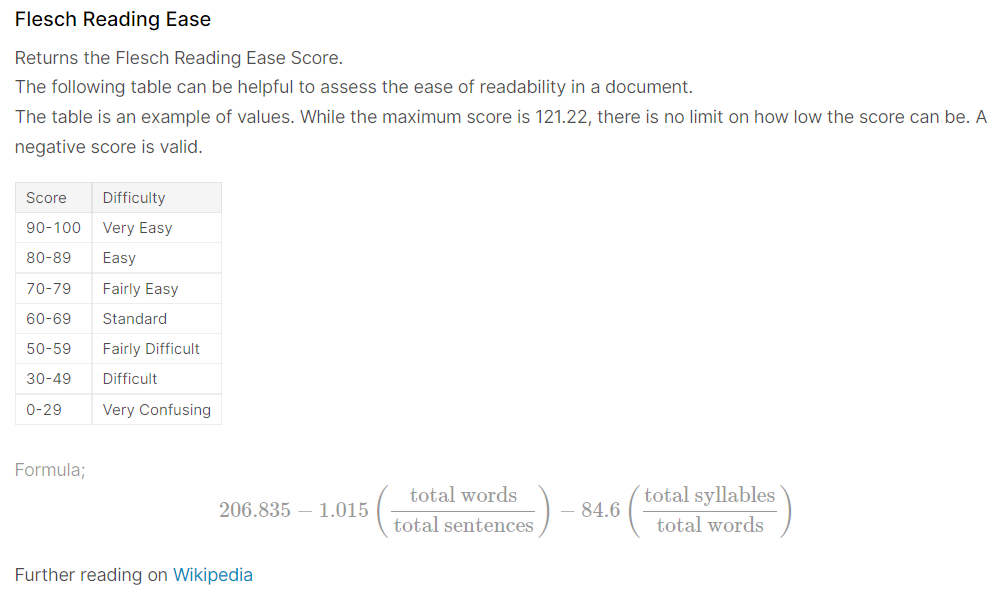

In [ ]:
test_data = (
    "Playing games has always been thought to be important to "
    "the development of well-balanced and creative children; "
    "however, what part, if any, they should play in the lives "
    "of adults has never been researched that deeply. I believe "
    "that playing games is every bit as important for adults "
    "as for children. Not only is taking time out to play games "
    "with our children and other adults valuable to building "
    "interpersonal relationships but is also a wonderful way "
    "to release built up tension."
)

In [ ]:

textstat.flesch_reading_ease(test_data)


52.23

In [150]:


# # Splits the text into sentences, using
# # Spacy's sentence segmentation which can
# # be found at https://spacy.io/usage/spacy-101
# def break_sentences(text):
# 	nlp = spacy.load('en_core_web_sm')
# 	doc = nlp(text)
# 	return list(doc.sents)

# # Returns Number of Words in the text
# def word_count(text):
# 	sentences = break_sentences(text)
# 	words = 0
# 	for sentence in sentences:
# 		words += len([token for token in sentence])
# 	return words

# # Returns the number of sentences in the text
# def sentence_count(text):
# 	sentences = break_sentences(text)
# 	return len(sentences)

# # Returns average sentence length
# def avg_sentence_length(text):
# 	words = word_count(text)
# 	sentences = sentence_count(text)
# 	average_sentence_length = float(words / sentences)
# 	return average_sentence_length

# # Textstat is a python package, to calculate statistics from
# # text to determine readability,
# # complexity and grade level of a particular corpus.
# # Package can be found at https://pypi.python.org/pypi/textstat
# def syllables_count(word):
# 	return textstatistics().syllable_count(word)

# # Returns the average number of syllables per
# # word in the text
# def avg_syllables_per_word(text):
# 	syllable = syllables_count(text)
# 	words = word_count(text)
# 	ASPW = float(syllable) / float(words)
# 	return legacy_round(ASPW, 1)

# # Return total Difficult Words in a text
# def difficult_words(text):
	
# 	nlp = spacy.load('en_core_web_sm')
# 	doc = nlp(text)
# 	# Find all words in the text
# 	words = []
# 	sentences = break_sentences(text)
# 	for sentence in sentences:
# 		words += [str(token) for token in sentence]

# 	# difficult words are those with syllables >= 2
# 	# easy_word_set is provide by Textstat as
# 	# a list of common words
# 	diff_words_set = set()
	
# 	for word in words:
# 		syllable_count = syllables_count(word)
# 		if word not in nlp.Defaults.stop_words and syllable_count >= 2:
# 			diff_words_set.add(word)

# 	return len(diff_words_set)

# # A word is polysyllablic if it has more than 3 syllables
# # this functions returns the number of all such words
# # present in the text
# def poly_syllable_count(text):
# 	count = 0
# 	words = []
# 	sentences = break_sentences(text)
# 	for sentence in sentences:
# 		words += [token for token in sentence]
	

# 	for word in words:
# 		syllable_count = syllables_count(word)
# 		if syllable_count >= 3:
# 			count += 1
# 	return count


# def flesch_reading_ease(text):
# 	"""
# 		Implements Flesch Formula:
# 		Reading Ease score = 206.835 - (1.015 × ASL) - (84.6 × ASW)
# 		Here,
# 		ASL = average sentence length (number of words
# 				divided by number of sentences)
# 		ASW = average word length in syllables (number of syllables
# 				divided by number of words)
# 	"""
# 	FRE = 206.835 - float(1.015 * avg_sentence_length(text)) -\
# 		float(84.6 * avg_syllables_per_word(text))
# 	return legacy_round(FRE, 2)


# def gunning_fog(text):
# 	per_diff_words = (difficult_words(text) / word_count(text) * 100) + 5
# 	grade = 0.4 * (avg_sentence_length(text) + per_diff_words)
# 	return grade


# def smog_index(text):
# 	"""
# 		Implements SMOG Formula / Grading
# 		SMOG grading = 3 + ?polysyllable count.
# 		Here,
# 		polysyllable count = number of words of more
# 		than two syllables in a sample of 30 sentences.
# 	"""

# 	if sentence_count(text) >= 3:
# 		poly_syllab = poly_syllable_count(text)
# 		SMOG = (1.043 * (30*(poly_syllab / sentence_count(text)))**0.5) \
# 				+ 3.1291
# 		return legacy_round(SMOG, 1)
# 	else:
# 		return 0


# def dale_chall_readability_score(text):
# 	"""
# 		Implements Dale Challe Formula:
# 		Raw score = 0.1579*(PDW) + 0.0496*(ASL) + 3.6365
# 		Here,
# 			PDW = Percentage of difficult words.
# 			ASL = Average sentence length
# 	"""
# 	words = word_count(text)
# 	# Number of words not termed as difficult words
# 	count = word_count - difficult_words(text)
# 	if words > 0:

# 		# Percentage of words not on difficult word list

# 		per = float(count) / float(words) * 100
	
# 	# diff_words stores percentage of difficult words
# 	diff_words = 100 - per

# 	raw_score = (0.1579 * diff_words) + \
# 				(0.0496 * avg_sentence_length(text))
	
# 	# If Percentage of Difficult Words is greater than 5 %, then;
# 	# Adjusted Score = Raw Score + 3.6365,
# 	# otherwise Adjusted Score = Raw Score

# 	if diff_words > 5:	

# 		raw_score += 3.6365
		
# 	return legacy_round(score, 2)


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
data = pd.read_excel("/content/drive/MyDrive/B4/Data/English_Exercises.xlsx")


In [12]:
data.head()

,Exo_type_id,Exo_type,Exo_objective,Exo_focus,Exo_id,Source_format,Target_format,Source_sentence_id,Source_word_id,Source_lang,...,Instruction,Sentence_w_blank,Right_answer,Options,Explanation,Difficulty,Remediation,dist_1,dist_2,dist_3
0,10,Flashcards,Learning vocabulary,NaN,1,text,text,NaN,1.0,French,...,NaN,Beauté,Beauty,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,Flashcards,Learning vocabulary,NaN,2,text,text,NaN,2.0,French,...,NaN,Verité,Truth,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,Flashcards,Learning vocabulary,NaN,3,text,text,NaN,3.0,French,...,NaN,Liberté,Freedom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,Flashcards,Learning vocabulary,NaN,4,text,text,NaN,4.0,French,...,NaN,Fraternité,Brotherhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,Flashcards,Learning vocabulary,NaN,5,text,text,NaN,5.0,French,...,NaN,Bonté,Kindness,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data["Exo_objective"].unique()

array(['Learning vocabulary', nan, 'Grammar', 'Verb_Conjugation'],
      dtype=object)

In [19]:
data[data["Exo_objective"]=='Grammar'] ["Sentence_w_blank"].iloc[2]

'... you prefer onions raw or cooked ? (do)'

In [20]:
data[data["Exo_objective"]=='Grammar']

,Exo_type_id,Exo_type,Exo_objective,Exo_focus,Exo_id,Source_format,Target_format,Source_sentence_id,Source_word_id,Source_lang,...,Instruction,Sentence_w_blank,Right_answer,Options,Explanation,Difficulty,Remediation,dist_1,dist_2,dist_3
12216,35,MCQ,Grammar,Verb Conjugation,1,text,text,40.0,NaN,French,...,Conjugate the verb correctly:,"... careful , this dog is nasty . (be)",Be,-Been-Was-Is-.,NaN,NaN,NaN,NaN,NaN,NaN
12217,35,MCQ,Grammar,Verb Conjugation,2,text,text,103.0,NaN,French,...,Conjugate the verb correctly:,"... careful , this dish is piping hot . (be)",Be,-Is-.-Being-Been,NaN,NaN,NaN,NaN,NaN,NaN
12218,35,MCQ,Grammar,Verb Conjugation,3,text,text,104.0,NaN,French,...,Conjugate the verb correctly:,... you prefer onions raw or cooked ? (do),Do,-Did-Doing-?-Does,NaN,NaN,NaN,NaN,NaN,NaN
12219,35,MCQ,Grammar,Verb Conjugation,4,text,text,144.0,NaN,French,...,Conjugate the verb correctly:,... you eaten enough ? (have),Have,-?-Having-Has-Had,NaN,NaN,NaN,NaN,NaN,NaN
12220,35,MCQ,Grammar,Verb Conjugation,5,text,text,167.0,NaN,French,...,Conjugate the verb correctly:,"... read somewhere else , the girl needs to sl...",Go,-Went-.-Gone-Going,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12579,35,MCQ,Grammar,Verb Conjugation,364,text,text,6967.0,NaN,French,...,Conjugate the verb correctly:,... you like soccer ? (do),Do,-?-Does-Doing-Did,NaN,NaN,NaN,NaN,NaN,NaN
12580,35,MCQ,Grammar,Verb Conjugation,365,text,text,6982.0,NaN,French,...,Conjugate the verb correctly:,... I have to pay a fine ? (do),Do,-Doing-Done-?-Does,NaN,NaN,NaN,NaN,NaN,NaN
12581,35,MCQ,Grammar,Verb Conjugation,366,text,text,6984.0,NaN,French,...,Conjugate the verb correctly:,... you had unprotected sex recently ? (have),Have,-Having-?-Had-Has,NaN,NaN,NaN,NaN,NaN,NaN
12582,35,MCQ,Grammar,Verb Conjugation,367,text,text,6993.0,NaN,French,...,Conjugate the verb correctly:,... you use contraceptives ? (do),Do,-Does-Done-Did-?,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data[data["Exo_objective"]=='Grammar']["Full_sentence"]

12216                      Attention, ce chien est méchant
12217                       Attention, le plat est brûlant
12218               Tu préfères les oignons crus ou cuits?
12219                                   Tu as assez mangé?
12220              Va lire ailleurs, la petite doit dormir
                               ...                        
12579                     Est-ce que tu aimes le football?
12580                 Est-ce que je dois payer une amende?
12581    Avez-vous eu des rapports sexuels non protégés...
12582    Est-ce que vous utilisez des moyens contracept...
12583                                          Au voleur !
Name: Full_sentence, Length: 368, dtype: object

In [33]:
test_data = data[data["Exo_objective"]=='Grammar']["Full_sentence"].iloc[4]

In [67]:
textstat.set_lang("fr_FR")



In [68]:
textstat.flesch_reading_ease("Beauté")

58.79

In [69]:
#create function to return Flesch Reading Score
def reading_ease_flesch(text_data):
  return textstat.flesch_reading_ease(text_data)

In [70]:
df = data[data['Full_sentence'].notna()]


In [55]:
# # Iterate all rows using DataFrame.itertuples()
# fle_score =[]
# for row in data.itertuples(index = True):
#     text_data =  getattr(row,'Full_sentence')
#     print(text_data)
#     fle_score.append(textstat.flesch_reading_ease(text_data))
    

In [71]:
df["flesch_scores"] = df["Full_sentence"].apply(lambda x:reading_ease_flesch(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
df

,Exo_type_id,Exo_type,Exo_objective,Exo_focus,Exo_id,Source_format,Target_format,Source_sentence_id,Source_word_id,Source_lang,...,Sentence_w_blank,Right_answer,Options,Explanation,Difficulty,Remediation,dist_1,dist_2,dist_3,flesch_scores
0,10,Flashcards,Learning vocabulary,NaN,1,text,text,NaN,1.0,French,...,Beauté,Beauty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.79
1,10,Flashcards,Learning vocabulary,NaN,2,text,text,NaN,2.0,French,...,Verité,Truth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.82
2,10,Flashcards,Learning vocabulary,NaN,3,text,text,NaN,3.0,French,...,Liberté,Freedom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.82
3,10,Flashcards,Learning vocabulary,NaN,4,text,text,NaN,4.0,French,...,Fraternité,Brotherhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-88.42
4,10,Flashcards,Learning vocabulary,NaN,5,text,text,NaN,5.0,French,...,Bonté,Kindness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21922,38,Cloze_Test,Verb_Conjugation,Grammar,904,text,text,6998.0,NaN,French,...,... thief ! (stop),Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.37
21923,38,Cloze_Test,Verb_Conjugation,Grammar,905,text,text,6999.0,NaN,French,...,I ... stolen (be),was,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.28
21924,38,Cloze_Test,Verb_Conjugation,Grammar,906,text,text,6999.0,NaN,French,...,I was ... (steal),stolen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.28
21925,38,Cloze_Test,Verb_Conjugation,Grammar,907,text,text,7000.0,NaN,French,...,You ... breaking up (be),are,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.26


# Full sentences are in french but we want them in English so we 

In [66]:
#checking how many types of exercise objectives
df["Exo_objective"].unique()

array(['Learning vocabulary', nan, 'Grammar', 'Verb_Conjugation'],
      dtype=object)

In [87]:
#subset exo objective for vocabularis
df_vocab = df[df["Exo_objective"]=="Learning vocabulary"]

In [91]:
df_vocab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3215 entries, 0 to 3215
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Exo_type_id         3215 non-null   int64  
 1   Exo_type            3215 non-null   object 
 2   Exo_objective       3215 non-null   object 
 3   Exo_focus           216 non-null    object 
 4   Exo_id              3215 non-null   int64  
 5   Source_format       3215 non-null   object 
 6   Target_format       3215 non-null   object 
 7   Source_sentence_id  0 non-null      float64
 8   Source_word_id      3215 non-null   float64
 9   Source_lang         3215 non-null   object 
 10  Target_lang         3215 non-null   object 
 11  Full_sentence       3215 non-null   object 
 12  Instruction         216 non-null    object 
 13  Sentence_w_blank    2999 non-null   object 
 14  Right_answer        3215 non-null   object 
 15  Options             216 non-null    object 
 16  Explan

In [76]:
df_vocab.head(10)

,Exo_type_id,Exo_type,Exo_objective,Exo_focus,Exo_id,Source_format,Target_format,Source_sentence_id,Source_word_id,Source_lang,...,Sentence_w_blank,Right_answer,Options,Explanation,Difficulty,Remediation,dist_1,dist_2,dist_3,flesch_scores
0,10,Flashcards,Learning vocabulary,NaN,1,text,text,NaN,1.0,French,...,Beauté,Beauty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.79
1,10,Flashcards,Learning vocabulary,NaN,2,text,text,NaN,2.0,French,...,Verité,Truth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.82
2,10,Flashcards,Learning vocabulary,NaN,3,text,text,NaN,3.0,French,...,Liberté,Freedom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.82
3,10,Flashcards,Learning vocabulary,NaN,4,text,text,NaN,4.0,French,...,Fraternité,Brotherhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-88.42
4,10,Flashcards,Learning vocabulary,NaN,5,text,text,NaN,5.0,French,...,Bonté,Kindness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.79
5,10,Flashcards,Learning vocabulary,NaN,6,text,text,NaN,6.0,French,...,Méchanceté,Wickedness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-88.42
6,10,Flashcards,Learning vocabulary,NaN,7,text,text,NaN,7.0,French,...,Elégance,Elegance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.79
7,10,Flashcards,Learning vocabulary,NaN,8,text,text,NaN,8.0,French,...,Différence,Difference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.82
8,10,Flashcards,Learning vocabulary,NaN,9,text,text,NaN,9.0,French,...,Idéal,Ideal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.39
9,10,Flashcards,Learning vocabulary,NaN,10,text,text,NaN,10.0,French,...,Modernité,Modernity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-88.42


In [77]:
#adjust text_stat
textstat.set_lang("en_US")

In [79]:
#apply function to df_vocab
df_vocab["flesch_scores"] = df_vocab["Right_answer"].apply(lambda x:reading_ease_flesch(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
df_vocab

,Exo_type_id,Exo_type,Exo_objective,Exo_focus,Exo_id,Source_format,Target_format,Source_sentence_id,Source_word_id,Source_lang,...,Sentence_w_blank,Right_answer,Options,Explanation,Difficulty,Remediation,dist_1,dist_2,dist_3,flesch_scores
0,10,Flashcards,Learning vocabulary,NaN,1,text,text,NaN,1.0,French,...,Beauté,Beauty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.62
1,10,Flashcards,Learning vocabulary,NaN,2,text,text,NaN,2.0,French,...,Verité,Truth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.22
2,10,Flashcards,Learning vocabulary,NaN,3,text,text,NaN,3.0,French,...,Liberté,Freedom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.62
3,10,Flashcards,Learning vocabulary,NaN,4,text,text,NaN,4.0,French,...,Fraternité,Brotherhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-47.99
4,10,Flashcards,Learning vocabulary,NaN,5,text,text,NaN,5.0,French,...,Bonté,Kindness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,14,MCQ,Learning vocabulary,Spellings,212,text,text,NaN,2975.0,French,...,NaN,Cashier,-Cashier-Cashieur-Casheir-Cashiar,NaN,NaN,NaN,NaN,NaN,NaN,121.22
3212,14,MCQ,Learning vocabulary,Spellings,213,text,text,NaN,2982.0,French,...,NaN,Shareholder,-Shareholder-Shareholdar-Shareholdar-Shereholder,NaN,NaN,NaN,NaN,NaN,NaN,-47.99
3213,14,MCQ,Learning vocabulary,Spellings,214,text,text,NaN,2991.0,French,...,NaN,Harassment,-Harassmant-Harasment-Harassssment-Harassment,NaN,NaN,NaN,NaN,NaN,NaN,-47.99
3214,14,MCQ,Learning vocabulary,Spellings,215,text,text,NaN,2993.0,French,...,NaN,Veterinary,-Veterinary-Veterinery-Vetarinary-Vetarinary,NaN,NaN,NaN,NaN,NaN,NaN,-47.99


In [93]:
df_gram = df[df["Exo_objective"]=="Grammar"]

In [95]:
df_gram.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 12216 to 12583
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Exo_type_id         368 non-null    int64  
 1   Exo_type            368 non-null    object 
 2   Exo_objective       368 non-null    object 
 3   Exo_focus           368 non-null    object 
 4   Exo_id              368 non-null    int64  
 5   Source_format       368 non-null    object 
 6   Target_format       368 non-null    object 
 7   Source_sentence_id  368 non-null    float64
 8   Source_word_id      0 non-null      float64
 9   Source_lang         368 non-null    object 
 10  Target_lang         368 non-null    object 
 11  Full_sentence       368 non-null    object 
 12  Instruction         368 non-null    object 
 13  Sentence_w_blank    368 non-null    object 
 14  Right_answer        368 non-null    object 
 15  Options             368 non-null    object 
 16  Ex

Testing how to retrieve answer from parentheses from sentence 

In [103]:
s="... careful , this dog is nasty . (be)"

In [122]:
answer = s[s.find("(")+1:s.find(")")]


In [121]:
df_gram.head()

,Exo_type_id,Exo_type,Exo_objective,Exo_focus,Exo_id,Source_format,Target_format,Source_sentence_id,Source_word_id,Source_lang,...,Sentence_w_blank,Right_answer,Options,Explanation,Difficulty,Remediation,dist_1,dist_2,dist_3,flesch_scores
12216,35,MCQ,Grammar,Verb Conjugation,1,text,text,40.0,NaN,French,...,"... careful , this dog is nasty . (be)",Be,-Been-Was-Is-.,NaN,NaN,NaN,NaN,NaN,NaN,84.17
12217,35,MCQ,Grammar,Verb Conjugation,2,text,text,103.0,NaN,French,...,"... careful , this dish is piping hot . (be)",Be,-Is-.-Being-Been,NaN,NaN,NaN,NaN,NaN,NaN,84.17
12218,35,MCQ,Grammar,Verb Conjugation,3,text,text,104.0,NaN,French,...,... you prefer onions raw or cooked ? (do),Do,-Did-Doing-?-Does,NaN,NaN,NaN,NaN,NaN,NaN,104.22
12219,35,MCQ,Grammar,Verb Conjugation,4,text,text,144.0,NaN,French,...,... you eaten enough ? (have),Have,-?-Having-Has-Had,NaN,NaN,NaN,NaN,NaN,NaN,92.54
12220,35,MCQ,Grammar,Verb Conjugation,5,text,text,167.0,NaN,French,...,"... read somewhere else , the girl needs to sl...",Go,-Went-.-Gone-Going,NaN,NaN,NaN,NaN,NaN,NaN,104.22


In [124]:
txt ="... careful , this dog is nasty . (be)"

In [129]:

re.sub("\(.*?\)","()", txt.replace("...", answer)).replace('(','').replace(')','')  

'be careful , this dog is nasty . '

In [133]:

def fill_blank(blank_sentence):
    """
    Replace ... with contents from brackets i.e answer
    Remove content inside parentheses
    Remove parentheses

    """
    answer = blank_sentence[blank_sentence.find("(")+1:s.find(")")]

    return re.sub("\(.*?\)","()", blank_sentence.replace("...", answer)).replace('(','').replace(')','')

In [134]:
df_gram["Full_sent2"] = df_gram["Sentence_w_blank"].apply(lambda x:fill_blank(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
df_gram.head()

,Exo_type_id,Exo_type,Exo_objective,Exo_focus,Exo_id,Source_format,Target_format,Source_sentence_id,Source_word_id,Source_lang,...,Sentence_w_blank,Right_answer,Options,Explanation,Difficulty,Remediation,dist_1,dist_2,dist_3,flesch_scores
12216,35,MCQ,Grammar,Verb Conjugation,1,text,text,40.0,NaN,French,...,"... careful , this dog is nasty . (be)",Be,-Been-Was-Is-.,NaN,NaN,NaN,NaN,NaN,NaN,99.23
12217,35,MCQ,Grammar,Verb Conjugation,2,text,text,103.0,NaN,French,...,"... careful , this dish is piping hot . (be)",Be,-Is-.-Being-Been,NaN,NaN,NaN,NaN,NaN,NaN,90.77
12218,35,MCQ,Grammar,Verb Conjugation,3,text,text,104.0,NaN,French,...,... you prefer onions raw or cooked ? (do),Do,-Did-Doing-?-Does,NaN,NaN,NaN,NaN,NaN,NaN,99.23
12219,35,MCQ,Grammar,Verb Conjugation,4,text,text,144.0,NaN,French,...,... you eaten enough ? (have),Have,-?-Having-Has-Had,NaN,NaN,NaN,NaN,NaN,NaN,92.80
12220,35,MCQ,Grammar,Verb Conjugation,5,text,text,167.0,NaN,French,...,"... read somewhere else , the girl needs to sl...",Go,-Went-.-Gone-Going,NaN,NaN,NaN,NaN,NaN,NaN,105.66


In [137]:
#apply function to df_gram
df_gram["flesch_scores"] = df_gram["Full_sent2"].apply(lambda x:reading_ease_flesch(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [138]:
#drop column of complete sentence to ensure data format 
df_gram = df_gram.drop(columns=['Full_sent2'])

Nan type exos

In [113]:
#subset nan type exos
df_nan = df[df['Exo_objective'].isna()]


In [115]:
df_nan.head()

,Exo_type_id,Exo_type,Exo_objective,Exo_focus,Exo_id,Source_format,Target_format,Source_sentence_id,Source_word_id,Source_lang,...,Sentence_w_blank,Right_answer,Options,Explanation,Difficulty,Remediation,dist_1,dist_2,dist_3,flesch_scores
3216,24,Flashcards,NaN,NaN,0,text,text,1.0,NaN,French,...,La beauté du paysage frappa les voyageurs,The beauty of the landscape struck the travell...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.14
3217,24,Flashcards,NaN,NaN,1,text,text,2.0,NaN,French,...,Personne ne connaît la vérité sur cette affaire,Nobody knows the truth about this affair.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.48
3218,24,Flashcards,NaN,NaN,2,text,text,3.0,NaN,French,...,"Dans une dictature, la liberté d'expression es...","In a dictatorship, freedom of expression is li...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.68
3219,24,Flashcards,NaN,NaN,3,text,text,4.0,NaN,French,...,"Liberté, égalité, fraternité est la devise de ...","Liberty, equality, fraternity is the motto of ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.29
3220,24,Flashcards,NaN,NaN,4,text,text,5.0,NaN,French,...,Il ne t'a pas aidé par bonté,He did not help you out of kindness.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.22


In [118]:
#check missing values
df_nan.isnull().sum()

Exo_type_id              0
Exo_type                 0
Exo_objective         8994
Exo_focus             8994
Exo_id                   0
Source_format            0
Target_format            0
Source_sentence_id       0
Source_word_id        8994
Source_lang              0
Target_lang              0
Full_sentence            0
Instruction           8994
Sentence_w_blank         0
Right_answer            12
Options               8994
Explanation           8994
Difficulty            8994
Remediation           8994
dist_1                8994
dist_2                8994
dist_3                8994
flesch_scores            0
dtype: int64

In [119]:
#subset dataset where 
df_nan = df_nan[df_nan["Right_answer"].notna()]

In [120]:
#apply function to df_nan
df_nan["flesch_scores"] = df_nan["Right_answer"].apply(lambda x:reading_ease_flesch(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Exo_type_id              0
Exo_type                 0
Exo_objective         8994
Exo_focus             8994
Exo_id                   0
Source_format            0
Target_format            0
Source_sentence_id       0
Source_word_id        8994
Source_lang              0
Target_lang              0
Full_sentence            0
Instruction           8994
Sentence_w_blank         0
Right_answer            12
Options               8994
Explanation           8994
Difficulty            8994
Remediation           8994
dist_1                8994
dist_2                8994
dist_3                8994
flesch_scores            0
dtype: int64

Verb conjugation

In [141]:
df_verb = df[df["Exo_objective"]=='Verb_Conjugation']

In [142]:
df_verb.head()

,Exo_type_id,Exo_type,Exo_objective,Exo_focus,Exo_id,Source_format,Target_format,Source_sentence_id,Source_word_id,Source_lang,...,Sentence_w_blank,Right_answer,Options,Explanation,Difficulty,Remediation,dist_1,dist_2,dist_3,flesch_scores
12584,38,Cloze_Test,Verb_Conjugation,Grammar,1,text,text,1.0,NaN,French,...,The beauty of the landscape ... the travellers...,struck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.48
12585,38,Cloze_Test,Verb_Conjugation,Grammar,2,text,text,2.0,NaN,French,...,Nobody ... the truth about this affair . (know),knows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.86
12586,38,Cloze_Test,Verb_Conjugation,Grammar,3,text,text,3.0,NaN,French,...,"In a dictatorship , freedom of expression ... ...",is,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.68
12587,38,Cloze_Test,Verb_Conjugation,Grammar,4,text,text,3.0,NaN,French,...,"In a dictatorship , freedom of expression is ....",limited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.68
12588,38,Cloze_Test,Verb_Conjugation,Grammar,5,text,text,4.0,NaN,French,...,"Liberty , equality , fraternity ... the motto ...",is,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.65


Similar strategy to grammar dataset

In [143]:
#pre-process data like 
df_verb["Full_sent2"] = df_verb["Sentence_w_blank"].apply(lambda x:fill_blank(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
#apply function to df_verb
df_verb["flesch_scores"] = df_verb["Full_sent2"].apply(lambda x:reading_ease_flesch(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [146]:
#drop column of complete sentence to ensure data format 
df_verb = df_verb.drop(columns=['Full_sent2'])

Final step : Stack all 4 dataframes together

In [148]:
final_df = pd.concat([df_vocab,df_gram,df_nan, df_verb], ignore_index=True, axis=0)


In [149]:
final_df.head()

,Exo_type_id,Exo_type,Exo_objective,Exo_focus,Exo_id,Source_format,Target_format,Source_sentence_id,Source_word_id,Source_lang,...,Sentence_w_blank,Right_answer,Options,Explanation,Difficulty,Remediation,dist_1,dist_2,dist_3,flesch_scores
0,10,Flashcards,Learning vocabulary,NaN,1,text,text,NaN,1.0,French,...,Beauté,Beauty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.79
1,10,Flashcards,Learning vocabulary,NaN,2,text,text,NaN,2.0,French,...,Verité,Truth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.82
2,10,Flashcards,Learning vocabulary,NaN,3,text,text,NaN,3.0,French,...,Liberté,Freedom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.82
3,10,Flashcards,Learning vocabulary,NaN,4,text,text,NaN,4.0,French,...,Fraternité,Brotherhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-88.42
4,10,Flashcards,Learning vocabulary,NaN,5,text,text,NaN,5.0,French,...,Bonté,Kindness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.79


In [151]:
final_df.to_csv("/content/drive/MyDrive/B4/Data/English_Exercises_diff.csv",index=False)